#***Stock Market data analysis 2018***

## Import data from trend 2018

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
uploaded = files.upload()

Saving AVN.csv to AVN (1).csv
Saving NETSOL.csv to NETSOL (1).csv
Saving PTC.csv to PTC (1).csv
Saving SYS.csv to SYS (1).csv


In [ ]:
df = pd.read_csv("SYS.csv") 
print(df)

             Time    Open    High     Low   Close  Volume
0     Jan 1, 2018   75.50   75.50   75.00   75.00    4000
1     Jan 2, 2018   74.85   76.00   73.11   75.32  197500
2     Jan 3, 2018   74.03   74.60   72.30   72.75   21000
3     Jan 4, 2018   71.03   74.50   71.03   74.01  381500
4     Jan 5, 2018   74.35   77.00   71.00   76.52  180500
..            ...     ...     ...     ...     ...     ...
238  Dec 24, 2018  106.00  110.00  106.00  109.60  126500
239  Dec 26, 2018  108.74  112.00  107.00  108.14   87000
240  Dec 27, 2018  110.49  110.49  107.00  108.61  400000
241  Dec 28, 2018  109.99  113.00  103.18  106.37  449000
242  Dec 31, 2018  105.88  110.50  105.75  109.87  408500

[243 rows x 6 columns]


## Check statistical summary

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,243.000000,243.000000,243.000000,243.000000,2.430000e+02
mean,101.239506,103.087037,99.965267,101.665021,1.721399e+05
std,13.036996,13.339068,12.485808,12.799630,2.574227e+05
min,71.030000,74.500000,71.000000,72.750000,5.000000e+02
25%,90.000000,92.065000,89.550000,91.900000,2.475000e+04
50%,97.000000,99.000000,96.900000,97.560000,6.800000e+04
75%,114.000000,115.500000,111.375000,113.245000,2.267500e+05
max,127.070000,129.700000,124.000000,127.320000,1.905500e+06


## Visualize data 

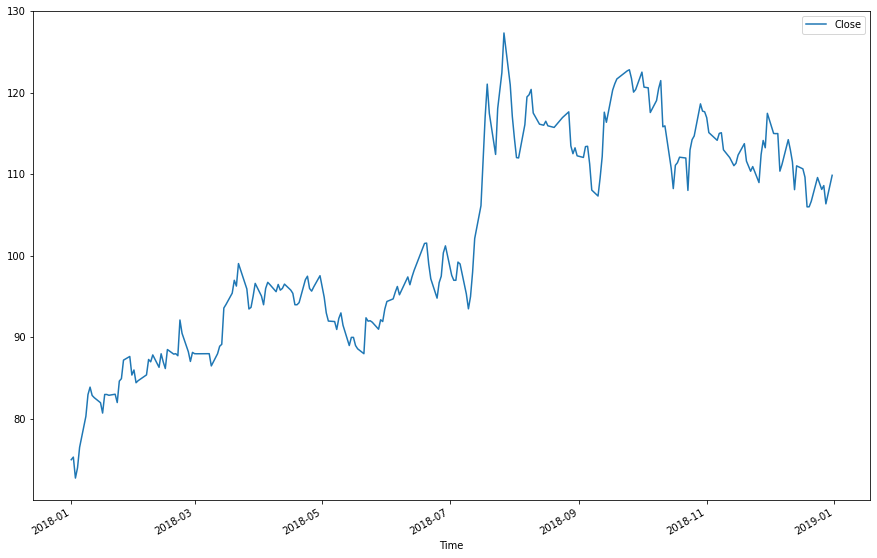

In [ ]:
df['Time'] = pd.to_datetime(df.Time) # correct the format of date

df = df.set_index('Time') # Set Time column as row index

df['Close'].plot(legend = True, figsize=(15,10))

This can be seen that the significant difference between the bigginign of the year to the end of year. Moreover, the stock trend goes up and down for random day which create a lot of noise. Therefore, we need to arrange data by moving average methods

##Arrange the data by moving average

### Moving average window

In [ ]:
days = 50
col_name = "mv_avg for " + str(days) + " days"

###New column to store and Calculate moving average

---



              Open    High     Low   Close  Volume  mv_avg for 50 days
Time                                                                  
2018-01-01   75.50   75.50   75.00   75.00    4000                 NaN
2018-01-02   74.85   76.00   73.11   75.32  197500                 NaN
2018-01-03   74.03   74.60   72.30   72.75   21000                 NaN
2018-01-04   71.03   74.50   71.03   74.01  381500                 NaN
2018-01-05   74.35   77.00   71.00   76.52  180500                 NaN
...            ...     ...     ...     ...     ...                 ...
2018-12-24  106.00  110.00  106.00  109.60  126500            112.4658
2018-12-26  108.74  112.00  107.00  108.14   87000            112.3122
2018-12-27  110.49  110.49  107.00  108.61  400000            112.1658
2018-12-28  109.99  113.00  103.18  106.37  449000            112.0784
2018-12-31  105.88  110.50  105.75  109.87  408500            112.1110

[243 rows x 6 columns]


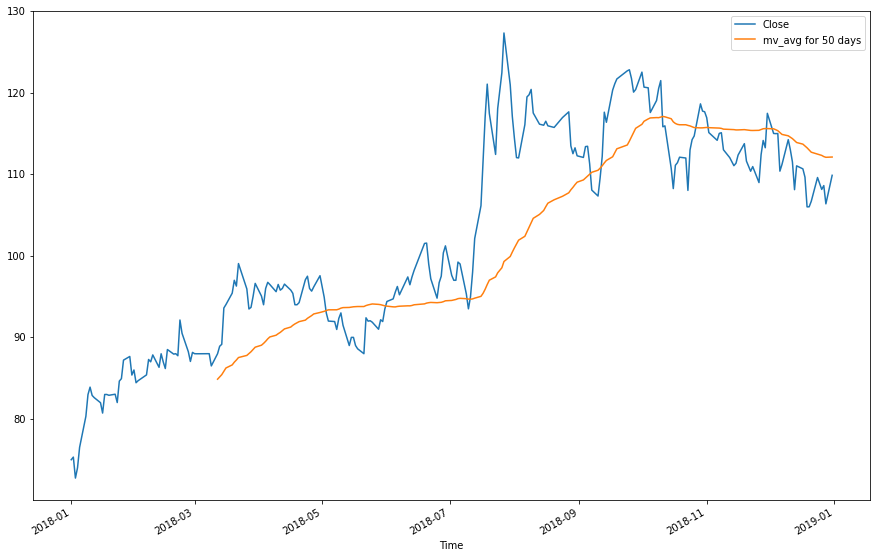

In [ ]:
col_name = "mv_avg for " + str(days) + " days"

df[col_name] = df['Close'].rolling(days).mean() 

print(df)

df[['Close', 'mv_avg for 50 days']].plot(figsize=(15,10)) 

It can be seen that the curve was smoother after using the moving average methods. The reason because the lower of number of days are higher sensitive fluctuation changes, contrary to higher number of days is less sensitive to these changes.

##Moving average comparisons

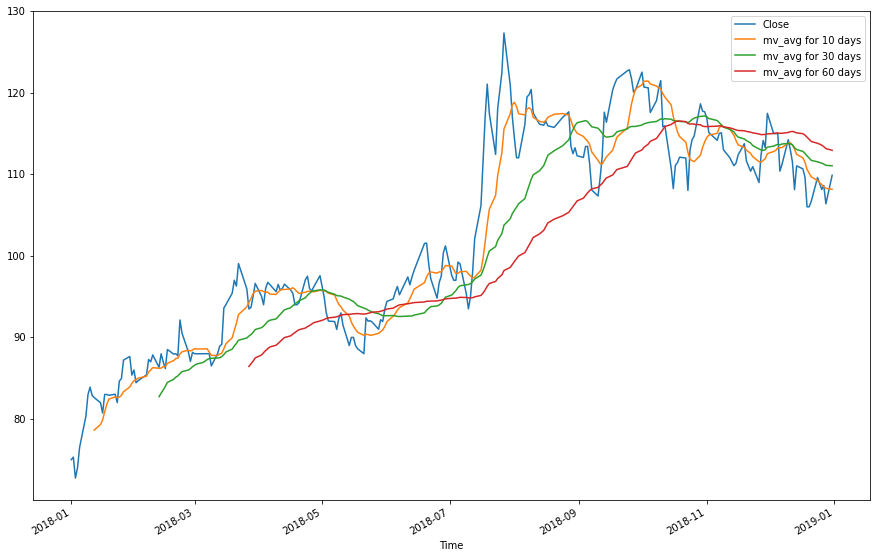

In [ ]:
days = [10, 30 , 60] # Multiple number of days
for day in days:
    col_name = "mv_avg for " + str(day) + " days"
    df[col_name] = df['Close'].rolling(day).mean()
    
df[['Close', 'mv_avg for 10 days', 'mv_avg for 30 days', 'mv_avg for 60 days']].plot(subplots = False, figsize=(15,10))

We can see the trends smoother by increasing the number of days. This also helps to understanding the trends better.

##Caculate the daily return


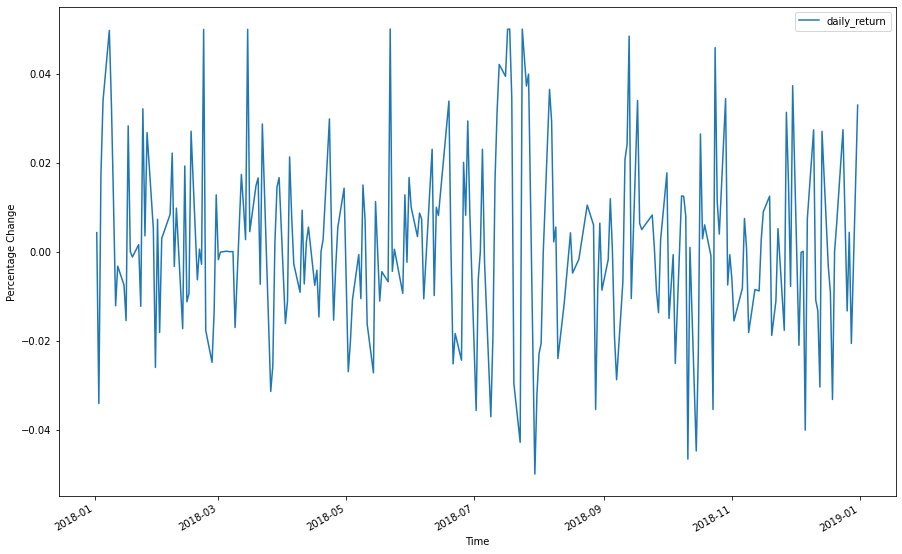

In [ ]:
daily_return = df['Close'].pct_change() 

df['daily_return'] = daily_return 

plt.ylabel('Percentage Change') 

df['daily_return'].plot(legend = True, figsize=(15,10)) 

The trend was observed from between (-0.04%, 0.04%) which not a huge difference. 

###Estimate daily return

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


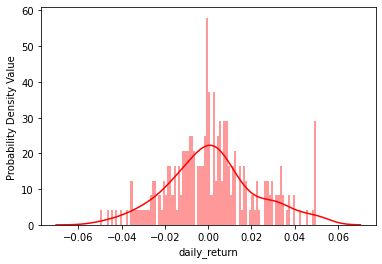

In [ ]:
plt.ylabel('Probability Density Value') # Assign a name to the y-axis of plot

sns.distplot(df['daily_return'].dropna(), bins = 100, color = 'red') 

## Caculate the colleration

In [ ]:
corr = (df.dropna()).corr()# Calculating correlation after dropping null values

print("The correlations\n", corr)


The correlations
                         Open      High  ...  mv_avg for 60 days  daily_return
Open                1.000000  0.986090  ...            0.733433     -0.039281
High                0.986090  1.000000  ...            0.740260      0.032846
Low                 0.988509  0.983614  ...            0.751306      0.016713
Close               0.978124  0.991460  ...            0.754694      0.098034
Volume              0.099857  0.116241  ...           -0.083027      0.151440
mv_avg for 50 days  0.769042  0.775068  ...            0.994053     -0.066408
mv_avg for 10 days  0.932846  0.934122  ...            0.836617     -0.094765
mv_avg for 30 days  0.836792  0.840557  ...            0.950376     -0.067537
mv_avg for 60 days  0.733433  0.740260  ...            1.000000     -0.060778
daily_return       -0.039281  0.032846  ...           -0.060778      1.000000

[10 rows x 10 columns]


In [ ]:
###Visualize colleration by heatmap

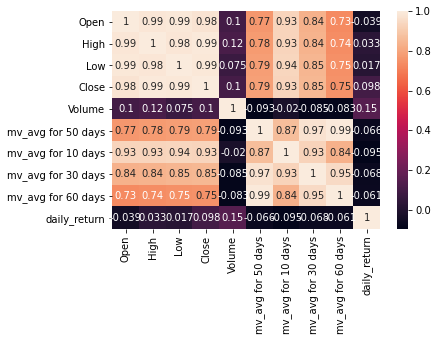

In [ ]:
sns.heatmap(corr, annot = True)

### Estimate daily return

                Open      High  ...  mv_avg for 60 days  daily_return
Time                            ...                                  
2018-01-01       NaN       NaN  ...                 NaN           NaN
2018-01-02 -0.008609  0.006623  ...                 NaN           NaN
2018-01-03 -0.010955 -0.018421  ...                 NaN     -8.997129
2018-01-04 -0.040524 -0.001340  ...                 NaN     -1.507592
2018-01-05  0.046741  0.033557  ...                 NaN      0.958149
...              ...       ...  ...                 ...           ...
2018-12-24  0.029026  0.014667  ...           -0.001931      3.330837
2018-12-26  0.025849  0.018182  ...           -0.001992     -1.486679
2018-12-27  0.016093 -0.013482  ...           -0.001682     -1.326264
2018-12-28 -0.004525  0.022717  ...           -0.002061     -5.745333
2018-12-31 -0.037367 -0.022124  ...           -0.001863     -2.595404

[243 rows x 10 columns]


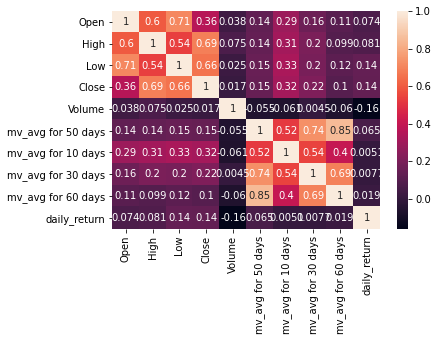

In [ ]:
all_returns = df.pct_change()
print(all_returns)

corr = (all_returns.dropna()).corr()
sns.heatmap(corr, annot = True)

## Calculte Risk in daily return

In [ ]:
ret = all_returns.dropna()
avg_daily_return = ret.mean() 
print("Averge daily return of companies\n", avg_daily_return)

daily_risk = ret.std()
print("\nDaily Risk or standard deviation of companies\n", daily_risk)

Averge daily return of companies
 Open                  0.001111
High                  0.001064
Low                   0.000998
Close                 0.001093
Volume                7.860802
mv_avg for 50 days    0.001326
mv_avg for 10 days    0.000771
mv_avg for 30 days    0.001143
mv_avg for 60 days    0.001464
daily_return               NaN
dtype: float64

Daily Risk or standard deviation of companies
 Open                   0.027637
High                   0.021861
Low                    0.023558
Close                  0.020593
Volume                55.300223
mv_avg for 50 days     0.002174
mv_avg for 10 days     0.006406
mv_avg for 30 days     0.002916
mv_avg for 60 days     0.001833
daily_return                NaN
dtype: float64


## Visualize the daily risk return